
Epoch 1: val_loss improved from inf to 0.14743, saving model to ./model\01-0.1474.hdf5

Epoch 2: val_loss improved from 0.14743 to 0.10209, saving model to ./model\02-0.1021.hdf5

Epoch 3: val_loss improved from 0.10209 to 0.08910, saving model to ./model\03-0.0891.hdf5

Epoch 4: val_loss improved from 0.08910 to 0.07802, saving model to ./model\04-0.0780.hdf5

Epoch 5: val_loss improved from 0.07802 to 0.07368, saving model to ./model\05-0.0737.hdf5

Epoch 6: val_loss improved from 0.07368 to 0.06732, saving model to ./model\06-0.0673.hdf5

Epoch 7: val_loss improved from 0.06732 to 0.06503, saving model to ./model\07-0.0650.hdf5

Epoch 8: val_loss improved from 0.06503 to 0.06252, saving model to ./model\08-0.0625.hdf5

Epoch 9: val_loss did not improve from 0.06252

Epoch 10: val_loss did not improve from 0.06252

Epoch 11: val_loss did not improve from 0.06252

Epoch 12: val_loss did not improve from 0.06252

Epoch 13: val_loss improved from 0.06252 to 0.06013, saving model to ./m

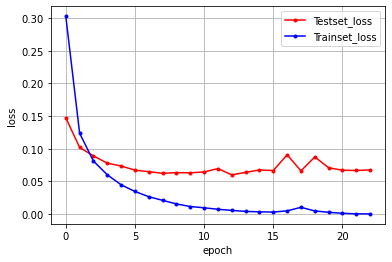

In [8]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

#데이터 로드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#데이터 전처리 과정
#28*28의 2차원 배열을 784줄의 1차원 배열로 바꾼후 255로 나누기 위해 자료형을 실수형으로 선언한 후 연산
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

#0~9값을 가진 Y배열을 0,1의 값을 가진 원 핫 인코딩으로 변환
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 최적화 설정
#저장 경로 설정, model폴더가 없을경우 model폴더 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#저장 경로 및 파일이름 지정 반복횟수-오차.hdf5형태    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
#저장 경로 지정, 기준 지정, 더 나은 결과일때만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# 학습도중 10회 반복에도 더 나은 결과를 못 낼경우 조기에 멈춤
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델의 실행
# X_train, Y_train 값으로  학습, test값으로 테스트, epochs는 전체 데이터 반복횟수, batch_size는 한번 학습할때 데이터량
#checkpointer를 기준으로 조기 멈춤
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])

#테스트 정확도 출력
print(f"\n Test Accuracy: {model.evaluate(X_test, Y_test)[1]:.4f}")

#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')

#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()